In [8]:
import re
from collections import defaultdict

import matplotlib.pyplot as plt

In [17]:
w = """[ 1/50] Epoch 1: Train Symbol Accuracy = 0.29377, Train Sentence Accuracy = 0.00081, Train WER = 0.65812, Train Loss = 1.14125, Validation Symbol Accuracy = 0.09519, Validation Sentence Accuracy = 0.00020, Validation WER = 0.71718, Validation Loss = 1.41935, lr = 7.000009998800143e-05 (time elapsed 00:36:50)
[ 2/50] Epoch 2: Train Symbol Accuracy = 0.39346, Train Sentence Accuracy = 0.00592, Train WER = 0.55425, Train Loss = 0.88540, Validation Symbol Accuracy = 0.16241, Validation Sentence Accuracy = 0.00989, Validation WER = 0.61709, Validation Loss = 1.22665, lr = 9.000019997600289e-05 (time elapsed 00:37:00)
[ 3/50] Epoch 3: Train Symbol Accuracy = 0.49198, Train Sentence Accuracy = 0.05063, Train WER = 0.42042, Train Loss = 0.71894, Validation Symbol Accuracy = 0.22134, Validation Sentence Accuracy = 0.07389, Validation WER = 0.45904, Validation Loss = 1.07524, lr = 0.00011000029996400431 (time elapsed 00:36:43)
[ 4/50] Epoch 4: Train Symbol Accuracy = 0.57513, Train Sentence Accuracy = 0.14189, Train WER = 0.31049, Train Loss = 0.58300, Validation Symbol Accuracy = 0.32300, Validation Sentence Accuracy = 0.14284, Validation WER = 0.38826, Validation Loss = 0.92672, lr = 0.00013000039995200577 (time elapsed 00:37:46)
[ 5/50] Epoch 5: Train Symbol Accuracy = 0.61946, Train Sentence Accuracy = 0.20849, Train WER = 0.25725, Train Loss = 0.50896, Validation Symbol Accuracy = 0.33538, Validation Sentence Accuracy = 0.21428, Validation WER = 0.33067, Validation Loss = 0.88660, lr = 0.00015000049994000719 (time elapsed 00:39:14)
[ 6/50] Epoch 6: Train Symbol Accuracy = 0.65977, Train Sentence Accuracy = 0.26086, Train WER = 0.21994, Train Loss = 0.44591, Validation Symbol Accuracy = 0.37493, Validation Sentence Accuracy = 0.21803, Validation WER = 0.31429, Validation Loss = 0.84512, lr = 0.00017000059992800865 (time elapsed 00:38:35)
[ 7/50] Epoch 7: Train Symbol Accuracy = 0.67407, Train Sentence Accuracy = 0.30092, Train WER = 0.19993, Train Loss = 0.42336, Validation Symbol Accuracy = 0.33917, Validation Sentence Accuracy = 0.24276, Validation WER = 0.31218, Validation Loss = 1.18874, lr = 0.0001900006999160101 (time elapsed 00:40:16)
[ 8/50] Epoch 8: Train Symbol Accuracy = 0.69342, Train Sentence Accuracy = 0.33165, Train WER = 0.18247, Train Loss = 0.39500, Validation Symbol Accuracy = 0.44382, Validation Sentence Accuracy = 0.31665, Validation WER = 0.25057, Validation Loss = 0.71511, lr = 0.00021000079990401155 (time elapsed 00:40:24)
[ 9/50] Epoch 9: Train Symbol Accuracy = 0.70124, Train Sentence Accuracy = 0.35357, Train WER = 0.17243, Train Loss = 0.38112, Validation Symbol Accuracy = 0.42003, Validation Sentence Accuracy = 0.31010, Validation WER = 0.24441, Validation Loss = 0.77958, lr = 0.000230000899892013 (time elapsed 00:41:29)
[10/50] Epoch 10: Train Symbol Accuracy = 0.70635, Train Sentence Accuracy = 0.37284, Train WER = 0.16498, Train Loss = 0.37226, Validation Symbol Accuracy = 0.48463, Validation Sentence Accuracy = 0.37705, Validation WER = 0.21688, Validation Loss = 0.65235, lr = 0.0002500009998800144 (time elapsed 00:42:53)
[11/50] Epoch 11: Train Symbol Accuracy = 0.72058, Train Sentence Accuracy = 0.39103, Train WER = 0.15507, Train Loss = 0.35144, Validation Symbol Accuracy = 0.49766, Validation Sentence Accuracy = 0.39114, Validation WER = 0.21518, Validation Loss = 0.63516, lr = 0.00027000109986801584 (time elapsed 00:42:11)
[12/50] Epoch 12: Train Symbol Accuracy = 0.71853, Train Sentence Accuracy = 0.40193, Train WER = 0.15245, Train Loss = 0.35622, Validation Symbol Accuracy = 0.51563, Validation Sentence Accuracy = 0.38849, Validation WER = 0.21195, Validation Loss = 0.63486, lr = 0.0002900011998560173 (time elapsed 00:43:50)
[13/50] Epoch 13: Train Symbol Accuracy = 0.72463, Train Sentence Accuracy = 0.41714, Train WER = 0.14681, Train Loss = 0.34521, Validation Symbol Accuracy = 0.52238, Validation Sentence Accuracy = 0.40133, Validation WER = 0.21121, Validation Loss = 0.61739, lr = 0.0003100012998440187 (time elapsed 00:44:33)
[14/50] Epoch 14: Train Symbol Accuracy = 0.72767, Train Sentence Accuracy = 0.42473, Train WER = 0.14315, Train Loss = 0.34078, Validation Symbol Accuracy = 0.53392, Validation Sentence Accuracy = 0.41717, Validation WER = 0.21145, Validation Loss = 0.61164, lr = 0.00033000139983202015 (time elapsed 00:45:04)
[15/50] Epoch 15: Train Symbol Accuracy = 0.73175, Train Sentence Accuracy = 0.43800, Train WER = 0.13890, Train Loss = 0.33597, Validation Symbol Accuracy = 0.54961, Validation Sentence Accuracy = 0.42441, Validation WER = 0.20093, Validation Loss = 0.60598, lr = 0.0003500014998200216 (time elapsed 00:45:11)
[16/50] Epoch 16: Train Symbol Accuracy = 0.73252, Train Sentence Accuracy = 0.43920, Train WER = 0.13737, Train Loss = 0.33420, Validation Symbol Accuracy = 0.54541, Validation Sentence Accuracy = 0.43585, Validation WER = 0.20736, Validation Loss = 0.64646, lr = 0.00037000159980802303 (time elapsed 00:45:40)
[17/50] Epoch 17: Train Symbol Accuracy = 0.73361, Train Sentence Accuracy = 0.44709, Train WER = 0.13538, Train Loss = 0.33128, Validation Symbol Accuracy = 0.54899, Validation Sentence Accuracy = 0.45339, Validation WER = 0.19019, Validation Loss = 0.57528, lr = 0.00039000169979602447 (time elapsed 00:46:16)
[18/50] Epoch 18: Train Symbol Accuracy = 0.73132, Train Sentence Accuracy = 0.44945, Train WER = 0.13567, Train Loss = 0.33513, Validation Symbol Accuracy = 0.55483, Validation Sentence Accuracy = 0.46218, Validation WER = 0.18190, Validation Loss = 0.55206, lr = 0.0004100017997840259 (time elapsed 00:47:29)
[19/50] Epoch 19: Train Symbol Accuracy = 0.72891, Train Sentence Accuracy = 0.45405, Train WER = 0.13402, Train Loss = 0.33859, Validation Symbol Accuracy = 0.56279, Validation Sentence Accuracy = 0.44579, Validation WER = 0.18732, Validation Loss = 0.53802, lr = 0.00043000189977202734 (time elapsed 00:48:41)
[20/50] Epoch 20: Train Symbol Accuracy = 0.73078, Train Sentence Accuracy = 0.45263, Train WER = 0.13430, Train Loss = 0.33456, Validation Symbol Accuracy = 0.55687, Validation Sentence Accuracy = 0.44819, Validation WER = 0.20149, Validation Loss = 0.61287, lr = 0.0004500019997600288 (time elapsed 00:47:58)
[21/50] Epoch 21: Train Symbol Accuracy = 0.72434, Train Sentence Accuracy = 0.45118, Train WER = 0.13660, Train Loss = 0.34669, Validation Symbol Accuracy = 0.56917, Validation Sentence Accuracy = 0.46553, Validation WER = 0.17458, Validation Loss = 0.54600, lr = 0.0004700020997480302 (time elapsed 00:49:52)
[22/50] Epoch 22: Train Symbol Accuracy = 0.72247, Train Sentence Accuracy = 0.45079, Train WER = 0.13757, Train Loss = 0.34642, Validation Symbol Accuracy = 0.56687, Validation Sentence Accuracy = 0.46623, Validation WER = 0.18592, Validation Loss = 0.54946, lr = 0.0004900021997360317 (time elapsed 00:49:47)
[23/50] Epoch 23: Train Symbol Accuracy = 0.71104, Train Sentence Accuracy = 0.44421, Train WER = 0.14276, Train Loss = 0.36345, Validation Symbol Accuracy = 0.57100, Validation Sentence Accuracy = 0.44689, Validation WER = 0.17843, Validation Loss = 0.54802, lr = 0.0004899977002759669 (time elapsed 00:51:26)
[24/50] Epoch 24: Train Symbol Accuracy = 0.71708, Train Sentence Accuracy = 0.45165, Train WER = 0.13924, Train Loss = 0.35250, Validation Symbol Accuracy = 0.53589, Validation Sentence Accuracy = 0.45099, Validation WER = 0.18341, Validation Loss = 0.59292, lr = 0.0004699976002879655 (time elapsed 00:50:55)
[25/50] Epoch 25: Train Symbol Accuracy = 0.71244, Train Sentence Accuracy = 0.45502, Train WER = 0.13950, Train Loss = 0.35670, Validation Symbol Accuracy = 0.57483, Validation Sentence Accuracy = 0.48821, Validation WER = 0.16780, Validation Loss = 0.54953, lr = 0.00044999750029996405 (time elapsed 00:52:39)
[26/50] Epoch 26: Train Symbol Accuracy = 0.71474, Train Sentence Accuracy = 0.45452, Train WER = 0.13928, Train Loss = 0.35406, Validation Symbol Accuracy = 0.59381, Validation Sentence Accuracy = 0.50310, Validation WER = 0.15676, Validation Loss = 0.52368, lr = 0.0004299974003119626 (time elapsed 00:52:32)
[27/50] Epoch 27: Train Symbol Accuracy = 0.72103, Train Sentence Accuracy = 0.46695, Train WER = 0.13347, Train Loss = 0.34563, Validation Symbol Accuracy = 0.61122, Validation Sentence Accuracy = 0.52528, Validation WER = 0.15000, Validation Loss = 0.49381, lr = 0.0004099973003239612 (time elapsed 00:52:29)
[28/50] Epoch 28: Train Symbol Accuracy = 0.71607, Train Sentence Accuracy = 0.47219, Train WER = 0.13434, Train Loss = 0.34980, Validation Symbol Accuracy = 0.62328, Validation Sentence Accuracy = 0.53033, Validation WER = 0.14443, Validation Loss = 0.48107, lr = 0.00038999720033595974 (time elapsed 00:54:30)
[29/50] Epoch 29: Train Symbol Accuracy = 0.72829, Train Sentence Accuracy = 0.48992, Train WER = 0.12684, Train Loss = 0.33196, Validation Symbol Accuracy = 0.61028, Validation Sentence Accuracy = 0.53837, Validation WER = 0.13536, Validation Loss = 0.51766, lr = 0.0003699971003479583 (time elapsed 00:54:27)
[30/50] Epoch 30: Train Symbol Accuracy = 0.72916, Train Sentence Accuracy = 0.49818, Train WER = 0.12444, Train Loss = 0.33067, Validation Symbol Accuracy = 0.63403, Validation Sentence Accuracy = 0.54561, Validation WER = 0.14024, Validation Loss = 0.46799, lr = 0.0003499970003599568 (time elapsed 00:55:03)
[31/50] Epoch 31: Train Symbol Accuracy = 0.73316, Train Sentence Accuracy = 0.50522, Train WER = 0.12121, Train Loss = 0.32357, Validation Symbol Accuracy = 0.64025, Validation Sentence Accuracy = 0.56390, Validation WER = 0.12913, Validation Loss = 0.45237, lr = 0.00032999690037195537 (time elapsed 00:55:41)
[32/50] Epoch 32: Train Symbol Accuracy = 0.73196, Train Sentence Accuracy = 0.51668, Train WER = 0.11944, Train Loss = 0.32493, Validation Symbol Accuracy = 0.65657, Validation Sentence Accuracy = 0.57479, Validation WER = 0.12393, Validation Loss = 0.43865, lr = 0.00030999680038395393 (time elapsed 00:57:33)
[33/50] Epoch 33: Train Symbol Accuracy = 0.73802, Train Sentence Accuracy = 0.52480, Train WER = 0.11585, Train Loss = 0.31612, Validation Symbol Accuracy = 0.63453, Validation Sentence Accuracy = 0.55945, Validation WER = 0.13089, Validation Loss = 0.46088, lr = 0.00028999670039595244 (time elapsed 00:57:02)
[34/50] Epoch 34: Train Symbol Accuracy = 0.73616, Train Sentence Accuracy = 0.53483, Train WER = 0.11413, Train Loss = 0.31510, Validation Symbol Accuracy = 0.63776, Validation Sentence Accuracy = 0.56690, Validation WER = 0.11779, Validation Loss = 0.48014, lr = 0.00026999660040795105 (time elapsed 00:58:34)
[35/50] Epoch 35: Train Symbol Accuracy = 0.73800, Train Sentence Accuracy = 0.53785, Train WER = 0.11267, Train Loss = 0.31183, Validation Symbol Accuracy = 0.66237, Validation Sentence Accuracy = 0.59502, Validation WER = 0.11292, Validation Loss = 0.44276, lr = 0.0002499965004199496 (time elapsed 00:59:53)
[36/50] Epoch 36: Train Symbol Accuracy = 0.75109, Train Sentence Accuracy = 0.55630, Train WER = 0.10588, Train Loss = 0.29629, Validation Symbol Accuracy = 0.68594, Validation Sentence Accuracy = 0.60417, Validation WER = 0.11174, Validation Loss = 0.40665, lr = 0.00022999640043194818 (time elapsed 00:59:08)
[37/50] Epoch 37: Train Symbol Accuracy = 0.75615, Train Sentence Accuracy = 0.57275, Train WER = 0.10104, Train Loss = 0.28726, Validation Symbol Accuracy = 0.68109, Validation Sentence Accuracy = 0.61161, Validation WER = 0.09990, Validation Loss = 0.43086, lr = 0.00020999630044394674 (time elapsed 01:00:10)
[38/50] Epoch 38: Train Symbol Accuracy = 0.75808, Train Sentence Accuracy = 0.57611, Train WER = 0.09991, Train Loss = 0.28390, Validation Symbol Accuracy = 0.69113, Validation Sentence Accuracy = 0.62180, Validation WER = 0.09793, Validation Loss = 0.41151, lr = 0.00018999620045594527 (time elapsed 01:00:18)
[39/50] Epoch 39: Train Symbol Accuracy = 0.76002, Train Sentence Accuracy = 0.58789, Train WER = 0.09723, Train Loss = 0.28055, Validation Symbol Accuracy = 0.70208, Validation Sentence Accuracy = 0.63274, Validation WER = 0.09452, Validation Loss = 0.40431, lr = 0.00016999610046794386 (time elapsed 01:01:51)
[40/50] Epoch 40: Train Symbol Accuracy = 0.76966, Train Sentence Accuracy = 0.60069, Train WER = 0.09233, Train Loss = 0.26861, Validation Symbol Accuracy = 0.70399, Validation Sentence Accuracy = 0.62595, Validation WER = 0.09977, Validation Loss = 0.37456, lr = 0.00014999600047994243 (time elapsed 01:01:44)
[41/50] Epoch 41: Train Symbol Accuracy = 0.77496, Train Sentence Accuracy = 0.61381, Train WER = 0.08877, Train Loss = 0.25906, Validation Symbol Accuracy = 0.71130, Validation Sentence Accuracy = 0.64453, Validation WER = 0.08885, Validation Loss = 0.38929, lr = 0.00012999590049194093 (time elapsed 01:02:34)
[42/50] Epoch 42: Train Symbol Accuracy = 0.78004, Train Sentence Accuracy = 0.62408, Train WER = 0.08580, Train Loss = 0.25135, Validation Symbol Accuracy = 0.72168, Validation Sentence Accuracy = 0.64443, Validation WER = 0.09187, Validation Loss = 0.36936, lr = 0.00010999580050393954 (time elapsed 01:02:31)
[43/50] Epoch 43: Train Symbol Accuracy = 0.78190, Train Sentence Accuracy = 0.63424, Train WER = 0.08378, Train Loss = 0.24730, Validation Symbol Accuracy = 0.72321, Validation Sentence Accuracy = 0.64678, Validation WER = 0.08812, Validation Loss = 0.37277, lr = 8.999570051593808e-05 (time elapsed 01:03:50)
[44/50] Epoch 44: Train Symbol Accuracy = 0.78578, Train Sentence Accuracy = 0.64359, Train WER = 0.08099, Train Loss = 0.24019, Validation Symbol Accuracy = 0.72162, Validation Sentence Accuracy = 0.64963, Validation WER = 0.08518, Validation Loss = 0.38739, lr = 6.999560052793663e-05 (time elapsed 01:05:05)
[45/50] Epoch 45: Train Symbol Accuracy = 0.79055, Train Sentence Accuracy = 0.65257, Train WER = 0.07812, Train Loss = 0.23263, Validation Symbol Accuracy = 0.74154, Validation Sentence Accuracy = 0.66587, Validation WER = 0.08152, Validation Loss = 0.35956, lr = 4.999777287861064e-05 (time elapsed 01:05:19)
[46/50] Epoch 46: Train Symbol Accuracy = 0.79243, Train Sentence Accuracy = 0.66320, Train WER = 0.07604, Train Loss = 0.22866, Validation Symbol Accuracy = 0.73619, Validation Sentence Accuracy = 0.66537, Validation WER = 0.08178, Validation Loss = 0.36741, lr = 4.009821830288851e-05 (time elapsed 01:06:16)
[47/50] Epoch 47: Train Symbol Accuracy = 0.79576, Train Sentence Accuracy = 0.66694, Train WER = 0.07501, Train Loss = 0.22466, Validation Symbol Accuracy = 0.73772, Validation Sentence Accuracy = 0.66807, Validation WER = 0.07924, Validation Loss = 0.37097, lr = 3.019866372716638e-05 (time elapsed 01:06:44)
[48/50] Epoch 48: Train Symbol Accuracy = 0.79847, Train Sentence Accuracy = 0.67176, Train WER = 0.07372, Train Loss = 0.22217, Validation Symbol Accuracy = 0.74546, Validation Sentence Accuracy = 0.67116, Validation WER = 0.07922, Validation Loss = 0.35737, lr = 2.029910915144425e-05 (time elapsed 01:07:22)
[49/50] Epoch 49: Train Symbol Accuracy = 0.79738, Train Sentence Accuracy = 0.67384, Train WER = 0.07341, Train Loss = 0.21908, Validation Symbol Accuracy = 0.74573, Validation Sentence Accuracy = 0.67276, Validation WER = 0.07905, Validation Loss = 0.35182, lr = 1.0399554575722127e-05 (time elapsed 01:08:00)
[50/50] Epoch 50: Train Symbol Accuracy = 0.80079, Train Sentence Accuracy = 0.67926, Train WER = 0.07216, Train Loss = 0.21679, Validation Symbol Accuracy = 0.74740, Validation Sentence Accuracy = 0.67561, Validation WER = 0.07683, Validation Loss = 0.36073, lr = 5e-05 ("""

In [18]:
# w = """
# [ 1/10] Epoch 1: Train Symbol Accuracy = 0.30302, Train Sentence Accuracy = 0.00066, Train WER = 0.65031, Train Loss = 1.11773, Validation Symbol Accuracy = 0.10502, Validation Sentence Accuracy = 0.00010, Validation WER = 0.72158, Validation Loss = 1.43994, lr = 0.000150002499750025 (time elapsed 00:37:01)
# [ 2/10] Epoch 2: Train Symbol Accuracy = 0.41200, Train Sentence Accuracy = 0.01538, Train WER = 0.51841, Train Loss = 0.85480, Validation Symbol Accuracy = 0.19906, Validation Sentence Accuracy = 0.04077, Validation WER = 0.51908, Validation Loss = 1.18273, lr = 0.00025000499950004996 (time elapsed 00:39:53)
# [ 3/10] Epoch 3: Train Symbol Accuracy = 0.52959, Train Sentence Accuracy = 0.11433, Train WER = 0.34577, Train Loss = 0.65441, Validation Symbol Accuracy = 0.25250, Validation Sentence Accuracy = 0.14239, Validation WER = 0.40078, Validation Loss = 1.13377, lr = 0.00035000749925007504 (time elapsed 00:41:40)
# [ 4/10] Epoch 4: Train Symbol Accuracy = 0.57466, Train Sentence Accuracy = 0.19590, Train WER = 0.27730, Train Loss = 0.57721, Validation Symbol Accuracy = 0.34958, Validation Sentence Accuracy = 0.19719, Validation WER = 0.33968, Validation Loss = 0.86943, lr = 0.0004500099990001 (time elapsed 00:46:04)
# [ 5/10] Epoch 5: Train Symbol Accuracy = 0.59276, Train Sentence Accuracy = 0.24564, Train WER = 0.24656, Train Loss = 0.54093, Validation Symbol Accuracy = 0.42880, Validation Sentence Accuracy = 0.29352, Validation WER = 0.27201, Validation Loss = 0.75295, lr = 0.000449987501249875 (time elapsed 00:49:24)
# [ 6/10] Epoch 6: Train Symbol Accuracy = 0.61808, Train Sentence Accuracy = 0.30452, Train WER = 0.21270, Train Loss = 0.49095, Validation Symbol Accuracy = 0.44756, Validation Sentence Accuracy = 0.33044, Validation WER = 0.24742, Validation Loss = 0.70921, lr = 0.00034998500149984997 (time elapsed 01:24:25)
# [ 7/10] Epoch 7: Train Symbol Accuracy = 0.63621, Train Sentence Accuracy = 0.36191, Train WER = 0.18729, Train Loss = 0.46000, Validation Symbol Accuracy = 0.53337, Validation Sentence Accuracy = 0.41167, Validation WER = 0.20150, Validation Loss = 0.59197, lr = 0.00024998250174982506 (time elapsed 00:55:48)
# [ 8/10] Epoch 8: Train Symbol Accuracy = 0.65859, Train Sentence Accuracy = 0.41269, Train WER = 0.16429, Train Loss = 0.42161, Validation Symbol Accuracy = 0.57723, Validation Sentence Accuracy = 0.47317, Validation WER = 0.17505, Validation Loss = 0.52210, lr = 0.00014998000199980004 (time elapsed 00:58:30)
# [ 9/10] Epoch 9: Train Symbol Accuracy = 0.67156, Train Sentence Accuracy = 0.45963, Train WER = 0.14733, Train Loss = 0.39457, Validation Symbol Accuracy = 0.60780, Validation Sentence Accuracy = 0.51744, Validation WER = 0.14976, Validation Loss = 0.47769, lr = 4.9988866396761134e-05 (time elapsed 01:02:26)
# [10/10] Epoch 10: Train Symbol Accuracy = 0.68083, Train Sentence Accuracy = 0.49260, Train WER = 0.13620, Train Loss = 0.37523, Validation Symbol Accuracy = 0.62182, Validation Sentence Accuracy = 0.53347, Validation WER = 0.14074, Validation Loss = 0.46235, lr = 5e-05 (time elapsed 01:05:37)
# """

In [19]:
x = re.findall(r'\b([a-zA-Z ]+) = (\d\.\d+(?:e-\d+)?)', w)

y = defaultdict(list)
for k, v in x:
    y[k].append(v)

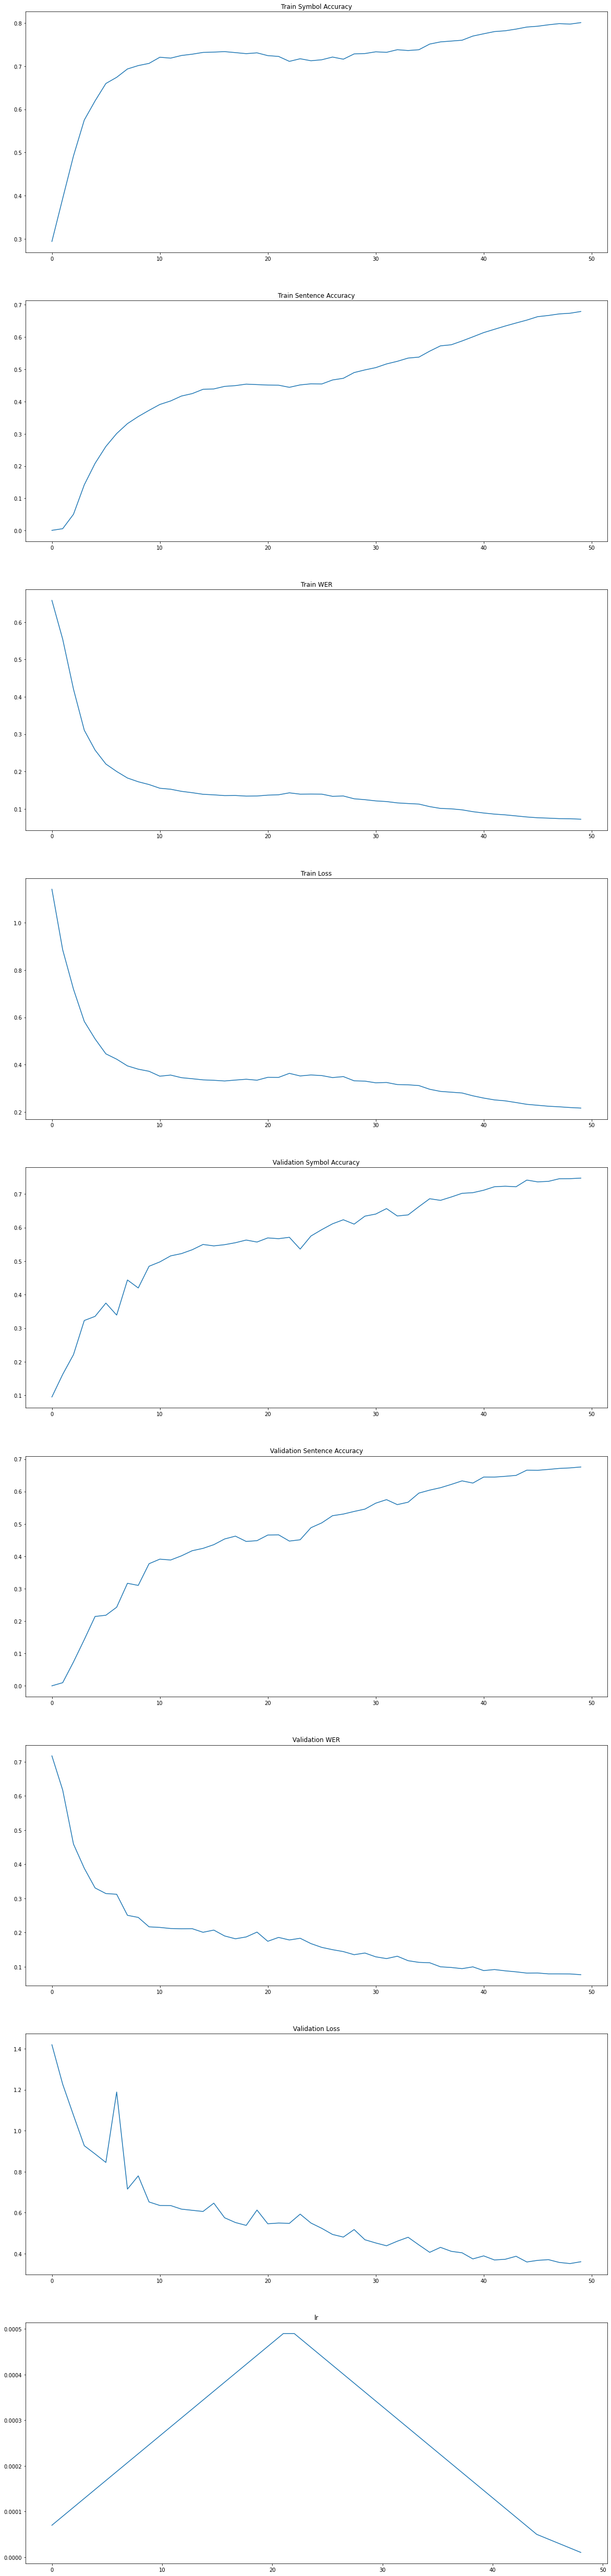

In [20]:
fig, axes = plt.subplots(len(y), figsize=(20, 10*len(y)))

idx = 0
for k in y:
    axes[idx].plot([float(a) for a in y[k]])
    axes[idx].set_title(k)
    
    idx += 1